In [1]:
import torch
import matplotlib.pyplot as plt

from models import TimeGAN
from utils import visualization
from dataloader import DataloaderHandler



In [2]:
# dataloader
dlh = DataloaderHandler(batch_size=128,
                        shuffle=True,
                        drop_last=True)

dl = dlh.sine_dataloader(sample_n=10000,
                         seq_len=24,
                         feature_n=1)

In [3]:
#model train
timegan = TimeGAN(dataloader=dl,
                input_dim=1,
                output_dim=1,
                hidden_dim=24,
                num_layers=3)

timegan.train(num_epochs_embedding=10,
            num_epochs_adversarial=10,
            num_epochs_supervised=10)

Epochs 10 / 10 G_loss : 0.69214 D_loss : 1.38992: 100%|██████████| 78/78 [00:20<00:00,  3.86it/s]


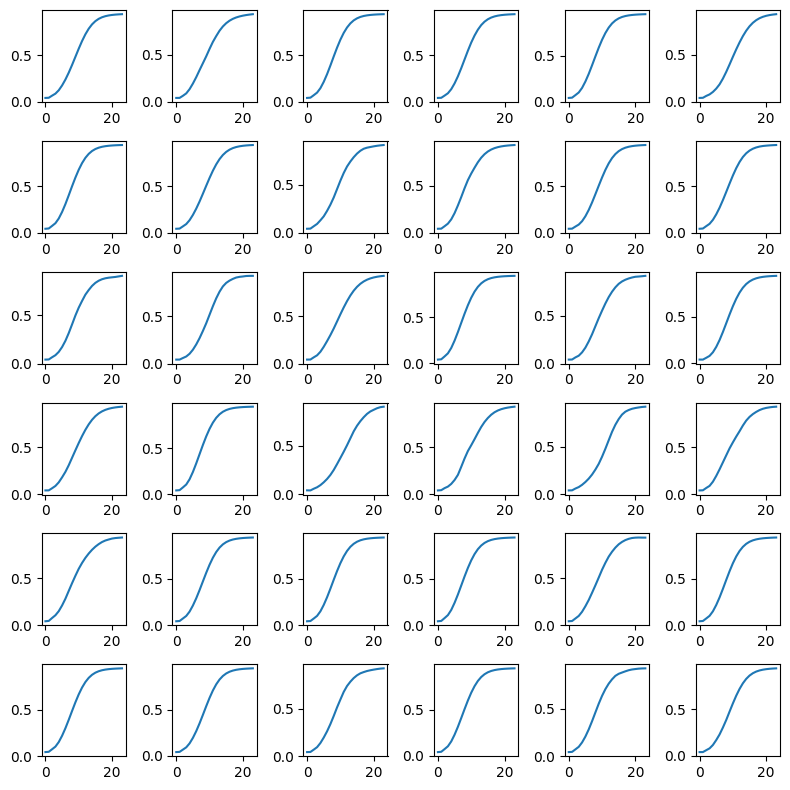

In [6]:
# test
Z = torch.randn(128, 24, 24)
X_fake = timegan(Z)

grid_size = 6
X_plot = X_fake[:grid_size*grid_size]

# mode collapse
fig, axes = plt.subplots(grid_size, grid_size, figsize=(8,8))
for i, X in enumerate(X_plot):
    r = i // grid_size
    c = i % grid_size
    axes[r][c].plot(X)
plt.tight_layout()
fig.savefig("test.png")



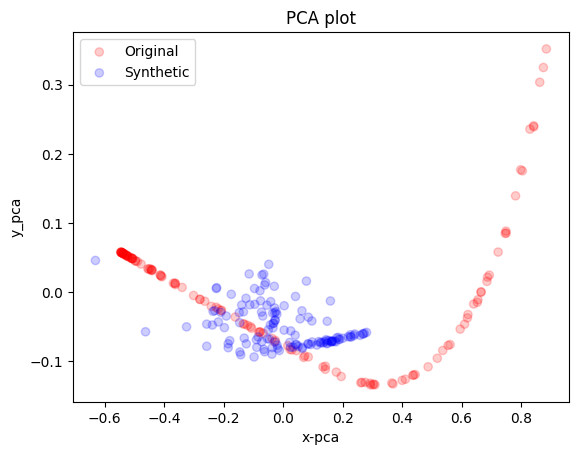

In [7]:
#visualization
X_real = next(iter(dl))

# very different compared to original
visualization(X_real, X_fake,"pca")


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 256 samples in 0.000s...
[t-SNE] Computed neighbors for 256 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 256 / 256
[t-SNE] Mean sigma: 0.088330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.693317
[t-SNE] KL divergence after 300 iterations: 0.139166


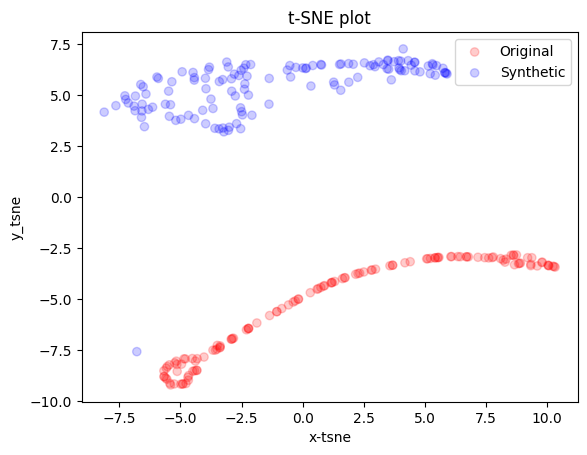

In [8]:
# very different compared to original
visualization(X_real, X_fake,"tsne")